In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [3]:
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris['Class'] = iris_dataset.target
#check for missing values
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [5]:
# Purposely create one more variable
iris['Class2'] = iris_dataset.target
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
Class2               0
dtype: int64

In [6]:
# Purposely create null values in ten entries

#print(iris['Class2'][45:65]) #print the dataset before replacing missing entries

iris['Class2'][50:60] = iris['Class2'][50:60].replace(1,np.nan)

# the following is deprecated
#iris['Class2'][50:60].replace(1,np.nan, inplace=True)

/var/folders/sw/ynbq3xcx5dd2tmnt7_scg1y80000gn/T/ipykernel_913/3342349487.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris['Class2'][50:60] = iris['Class2'][50:60].replace(1,np.nan)


In [7]:
print(iris['Class2'][45:65])

45    0.0
46    0.0
47    0.0
48    0.0
49    0.0
50    NaN
51    NaN
52    NaN
53    NaN
54    NaN
55    NaN
56    NaN
57    NaN
58    NaN
59    NaN
60    1.0
61    1.0
62    1.0
63    1.0
64    1.0
Name: Class2, dtype: float64


In [8]:
#check for missing values
iris.isnull().sum()

sepal length (cm)     0
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
Class                 0
Class2               10
dtype: int64

In [9]:
# Remove Class2
iris.drop('Class2', axis=1, inplace=True)
#check for missing values again
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Class                0
dtype: int64

In [10]:
# test our access of last two columns
print(iris[["petal length (cm)","Class"]])

     petal length (cm)  Class
0                  1.4      0
1                  1.4      0
2                  1.3      0
3                  1.5      0
4                  1.4      0
..                 ...    ...
145                5.2      2
146                5.0      2
147                5.2      2
148                5.4      2
149                5.1      2

[150 rows x 2 columns]


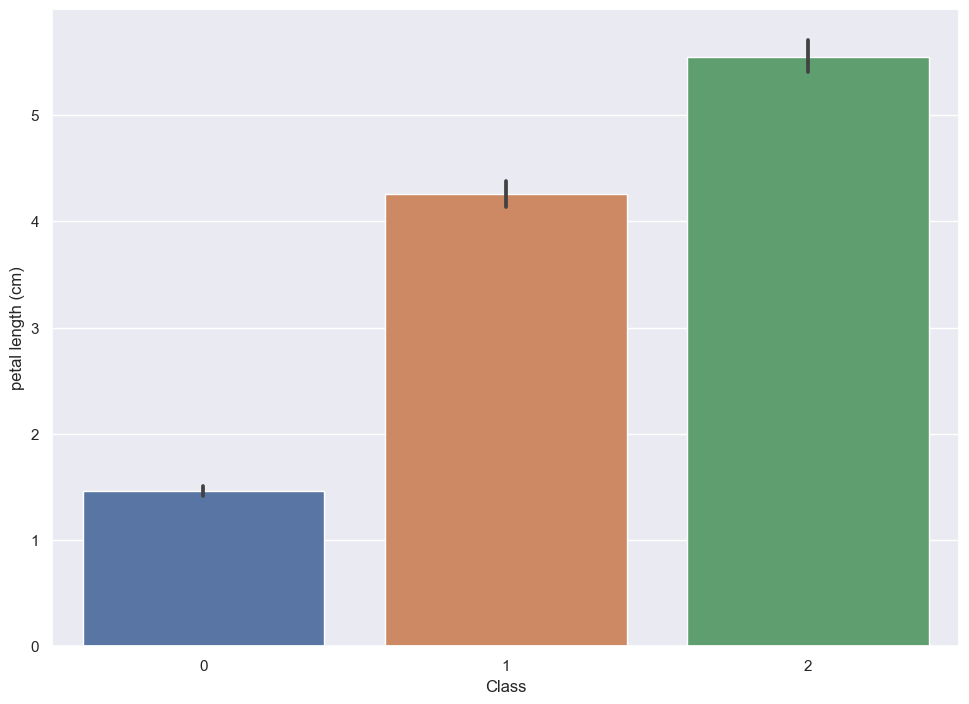

In [11]:
#plot the distribution of Class variable
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x="Class", y="petal length (cm)", data=iris)
plt.show()

In [12]:
# import k-means
from sklearn.cluster import KMeans
# choose 3 clusters
kmeans = KMeans(n_clusters=3)
#print(iris)
data = iris
# fit k means to random integers
kmeans.fit(data)
cluster_labels = kmeans.predict(data)
print(cluster_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
# crosstab to see relationship between Clusters and Class
pd.crosstab(index=iris['Class'], columns=cluster_labels)



col_0,0,1,2
Class,,,
0,50,0,0
1,0,50,0
2,0,1,49


Text(0, 0.5, 'petal width (cm)')

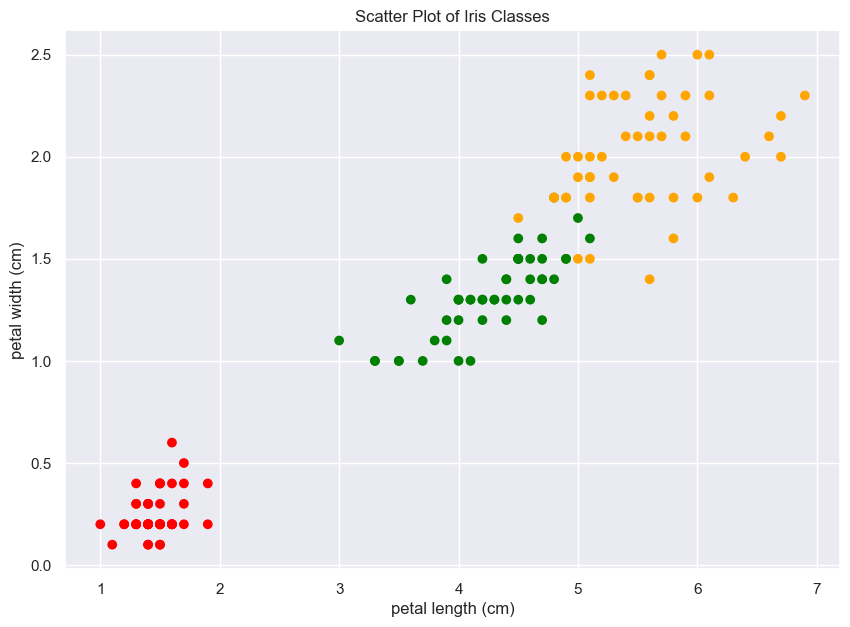

In [14]:
plt.figure(figsize=(10, 7))
colors = {0:'red', 1:'green', 2:'orange'}

plt.scatter(iris['petal length (cm)'], iris['petal width (cm)'], c=iris['Class'].map(colors))
plt.title('Scatter Plot of Iris Classes')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Text(0, 0.5, 'petal width (cm)')

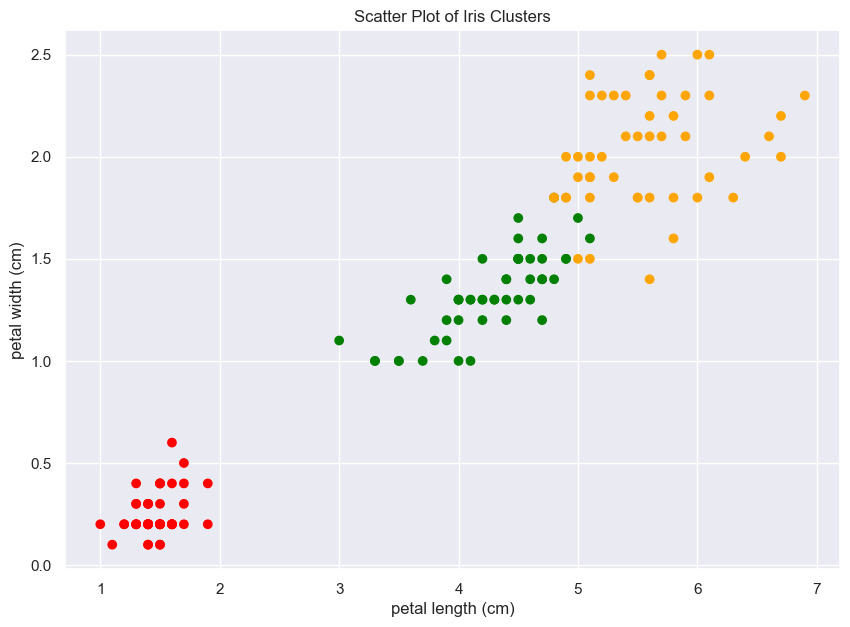

In [15]:
plt.figure(figsize=(10, 7))

colors = {0:'red', 1:'green', 2:'orange'}
# need to convert cluster_labels from np_array to pandas dataframe to use the map function later
labels = pd.DataFrame(cluster_labels, columns = ['ClusterName'])
plt.scatter(iris['petal length (cm)'], iris['petal width (cm)'], c=labels['ClusterName'].map(colors))
plt.title('Scatter Plot of Iris Clusters')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')